# Análisis de Gastos Financieros Personales

Objetivo del Proyecto:
El objetivo de este proyecto es analizar detalladamente los gastos financieros personales a partir de datos transaccionales. Se abordarán las siguientes siete preguntas clave para comprender mejor los hábitos financieros y tomar decisiones informadas sobre la gestión del presupuesto y la planificación financiera

# Importación

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Obtiene el directorio actual
directorio_actual = os.getcwd()

# Nombre del archivo CSV que se desea abrir
nombre_archivo = "personal_transactions_finance.csv"

# Se Construye la ruta completa del archivo utilizando os.path.join
ruta_completa = os.path.join(directorio_actual, nombre_archivo)

# Verifico si el archivo existe antes de intentar abrirlo
if os.path.exists(ruta_completa):
    # Abre el archivo CSV utilizando pandas
    df = pd.read_csv(ruta_completa)

else:
    print(f"El archivo {nombre_archivo} no existe en el directorio actual.")


In [10]:
type(df)

pandas.core.frame.DataFrame

# Limpieza de datos

In [3]:
df

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card
...,...,...,...,...,...,...
801,09/27/2019,Biweekly Paycheck,2250.00,credit,Paycheck,Checking
802,09/28/2019,BP,33.46,debit,Gas & Fuel,Platinum Card
803,09/28/2019,Sheetz,4.27,debit,Gas & Fuel,Platinum Card
804,09/30/2019,Starbucks,1.75,debit,Coffee Shops,Platinum Card


In [4]:
df.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [5]:
df.tail()

,Date,Description,Amount,Transaction Type,Category,Account Name
801,09/27/2019,Biweekly Paycheck,2250.00,credit,Paycheck,Checking
802,09/28/2019,BP,33.46,debit,Gas & Fuel,Platinum Card
803,09/28/2019,Sheetz,4.27,debit,Gas & Fuel,Platinum Card
804,09/30/2019,Starbucks,1.75,debit,Coffee Shops,Platinum Card
805,09/30/2019,Internet Service Provider,75.00,debit,Internet,Checking


In [6]:
df.shape

(806, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.9+ KB


In [8]:
df.count()

Date                806
Description         806
Amount              806
Transaction Type    806
Category            806
Account Name        806
dtype: int64

In [9]:
df.dtypes

Date                 object
Description          object
Amount              float64
Transaction Type     object
Category             object
Account Name         object
dtype: object

In [11]:
df.columns

Index(['Date', 'Description', 'Amount', 'Transaction Type', 'Category',
       'Account Name'],
      dtype='object')

In [15]:
df.duplicated().any()

False

# Analizando los Gastos Financieros

¿Cuál es el gasto total en cada categoría?

In [18]:
#Calcular el Gasto total en cada categoria

gasto_por_categoria = df.groupby('Category')['Amount'].sum().sort_values(ascending = False)

gasto_por_categoria

Category
Paycheck                  93750.00
Credit Card Payment       63561.12
Mortgage & Rent           24754.50
Home Improvement          19092.87
Groceries                  2795.21
Utilities                  2776.00
Restaurants                2613.02
Shopping                   1973.24
Gas & Fuel                 1715.17
Mobile Phone               1680.40
Internet                   1570.88
Auto Insurance             1350.00
Electronics & Software      719.00
Alcohol & Bars              539.13
Haircut                     378.00
Fast Food                   330.63
Music                       224.49
Movies & DVDs               222.19
Coffee Shops                115.54
Television                  104.78
Food & Dining                77.75
Entertainment                 9.62
Name: Amount, dtype: float64

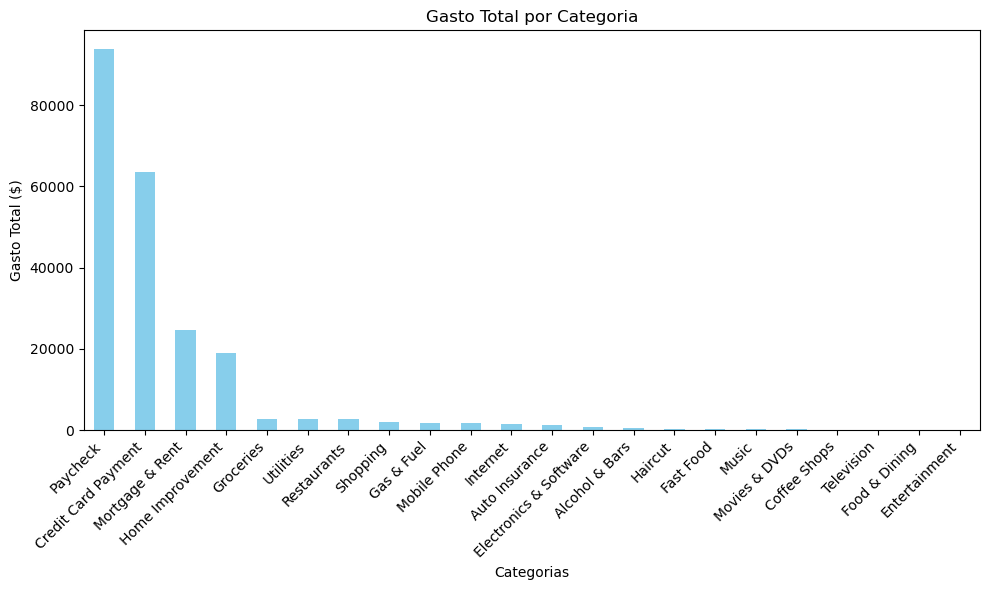

In [19]:
plt.figure(figsize = (10,6))
gasto_por_categoria.plot(kind = 'bar',color = 'skyblue')
plt.title('Gasto Total por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Gasto Total ($)')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

¿Cuál es el patrón de gastos mensuales a lo largo del año?

In [22]:
# Convertir la columna de fechas a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
#Extraer el mes y el año de la fecha
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [25]:
df

,Date,Description,Amount,Transaction Type,Category,Account Name,Month,Year
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card,1,2018
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,1,2018
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card,1,2018
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,1,2018
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card,1,2018
...,...,...,...,...,...,...,...,...
801,2019-09-27,Biweekly Paycheck,2250.00,credit,Paycheck,Checking,9,2019
802,2019-09-28,BP,33.46,debit,Gas & Fuel,Platinum Card,9,2019
803,2019-09-28,Sheetz,4.27,debit,Gas & Fuel,Platinum Card,9,2019
804,2019-09-30,Starbucks,1.75,debit,Coffee Shops,Platinum Card,9,2019


In [26]:
df.shape

(806, 8)

In [29]:
# Agrupar por mes y año, y calcular la suma de los montos
gasto_mensual = df.groupby(['Year','Month'])['Amount'].sum()
gasto_mensual

Year  Month
2018  1        10094.34
      2         8385.80
      3        10821.66
      4        13196.42
      5        16483.58
      6         9683.07
      7         7635.32
      8         9775.33
      9         8521.70
      10        7870.58
      11        8982.61
      12        9063.09
2019  1         9956.75
      2         7663.41
      3        11033.76
      4        10761.44
      5        10014.52
      6        16513.95
      7         9790.46
      8        11570.27
      9        12535.48
Name: Amount, dtype: float64

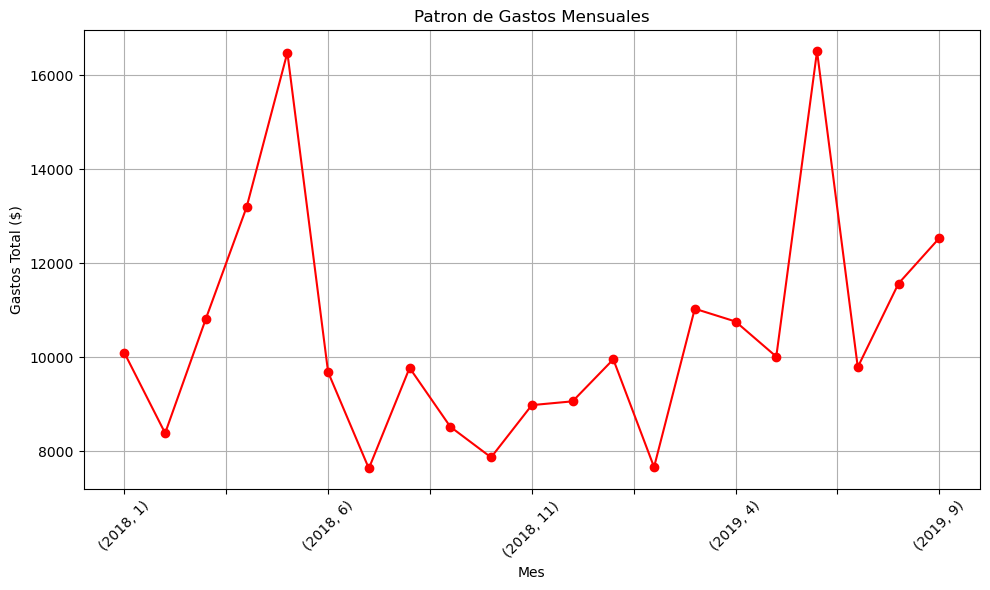

In [31]:
# Visualizar los resultados (gráfico de líneas)
plt.figure(figsize=(10,6))
gasto_mensual.plot(kind='line',marker = 'o',color = 'red')
plt.title('Patron de Gastos Mensuales')
plt.xlabel('Mes')
plt.ylabel('Gastos Total ($)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

¿Cuál es la distribución de gastos entre tarjetas y cuentas bancarias?

In [35]:
df.columns

Index(['Date', 'Description', 'Amount', 'Transaction Type', 'Category',
       'Account Name', 'Month', 'Year'],
      dtype='object')

In [36]:
df

,Date,Description,Amount,Transaction Type,Category,Account Name,Month,Year
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card,1,2018
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,1,2018
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card,1,2018
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,1,2018
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card,1,2018
...,...,...,...,...,...,...,...,...
801,2019-09-27,Biweekly Paycheck,2250.00,credit,Paycheck,Checking,9,2019
802,2019-09-28,BP,33.46,debit,Gas & Fuel,Platinum Card,9,2019
803,2019-09-28,Sheetz,4.27,debit,Gas & Fuel,Platinum Card,9,2019
804,2019-09-30,Starbucks,1.75,debit,Coffee Shops,Platinum Card,9,2019


¿Cuál es la distribución de gastos entre tarjetas y cuentas bancarias?

In [38]:
# Agrupar por tipo de cuenta o tarjeta y calcular la suma de los montos
gasto_por_tipo = df.groupby(['Account Name'])['Amount'].sum()
gasto_por_tipo

Account Name
Checking         176248.14
Platinum Card     30136.24
Silver Card       13969.16
Name: Amount, dtype: float64

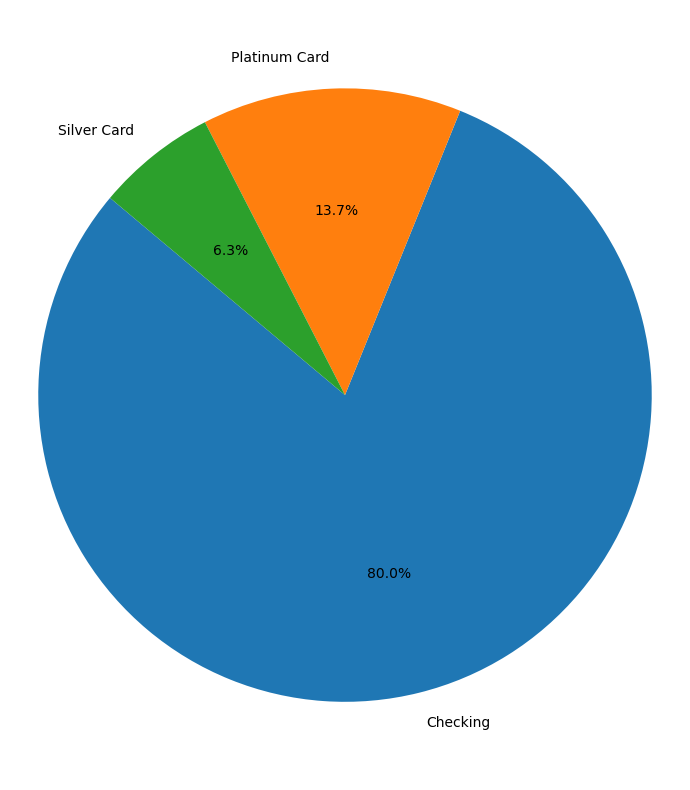

In [48]:
# Visualizar los resultados (gráfico circular)
plt.figure(figsize = (7,8))
plt.pie(gasto_por_tipo,labels = gasto_por_tipo.index,autopct = '%1.1f%%',startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.show()

¿Cuáles son las principales categorías de gastos?

In [44]:
# Identificar las principales categorías de gastos y calcular los montos totales asociados a cada una
gasto_por_categoria.head(10)

Category
Paycheck               93750.00
Credit Card Payment    63561.12
Mortgage & Rent        24754.50
Home Improvement       19092.87
Groceries               2795.21
Utilities               2776.00
Restaurants             2613.02
Shopping                1973.24
Gas & Fuel              1715.17
Mobile Phone            1680.40
Name: Amount, dtype: float64

In [45]:
# Analizar los impulsores del gasto dentro de cada categoría
for categoria in gasto_por_categoria.index:
    gastos_categoria = df[df['Category'] == categoria]
    transacciones_comunes = gastos_categoria['Description'].value_counts().head(5)  # Top 5 transacciones comunes
    print(f"Principales transacciones en la categoría '{categoria}':")
    print(transacciones_comunes)
    print("\n")

Principales transacciones en la categoría 'Paycheck':
Biweekly Paycheck    46
Name: Description, dtype: int64


Principales transacciones en la categoría 'Credit Card Payment':
Credit Card Payment    143
Name: Description, dtype: int64


Principales transacciones en la categoría 'Mortgage & Rent':
Mortgage Payment    21
Name: Description, dtype: int64


Principales transacciones en la categoría 'Home Improvement':
Hardware Store             34
Mike's Construction Co.     2
Name: Description, dtype: int64


Principales transacciones en la categoría 'Groceries':
Grocery Store      103
Blue Sky Market      1
Food Truck           1
Name: Description, dtype: int64


Principales transacciones en la categoría 'Utilities':
Gas Company           21
City Water Charges    21
Power Company         21
Name: Description, dtype: int64


Principales transacciones en la categoría 'Restaurants':
American Tavern      22
Brunch Restaurant    11
Thai Restaurant       9
Fancy Restaurant      7
Greek Restaur

¿Cuáles son los días de la semana con más gastos?

In [49]:
# Agregar una columna para el día de la semana (0 = lunes, 6 = domingo)

df['Day_of_Week'] = df['Date'].dt.dayofweek

In [50]:
df

,Date,Description,Amount,Transaction Type,Category,Account Name,Month,Year,Day_of_Week
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card,1,2018,0
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,1,2018,1
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card,1,2018,1
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,1,2018,2
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card,1,2018,3
...,...,...,...,...,...,...,...,...,...
801,2019-09-27,Biweekly Paycheck,2250.00,credit,Paycheck,Checking,9,2019,4
802,2019-09-28,BP,33.46,debit,Gas & Fuel,Platinum Card,9,2019,5
803,2019-09-28,Sheetz,4.27,debit,Gas & Fuel,Platinum Card,9,2019,5
804,2019-09-30,Starbucks,1.75,debit,Coffee Shops,Platinum Card,9,2019,0


In [60]:
# Calcular el total de gastos por día de la semana
gastos_por_dia = df.groupby('Day_of_Week')['Amount'].sum()
gastos_por_dia

Day_of_Week
0     28961.75
1     19148.71
2     14765.98
3     28846.23
4    120297.97
5      4870.78
6      3462.12
Name: Amount, dtype: float64

In [52]:
# Mapear los números de los días de la semana a nombres
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']


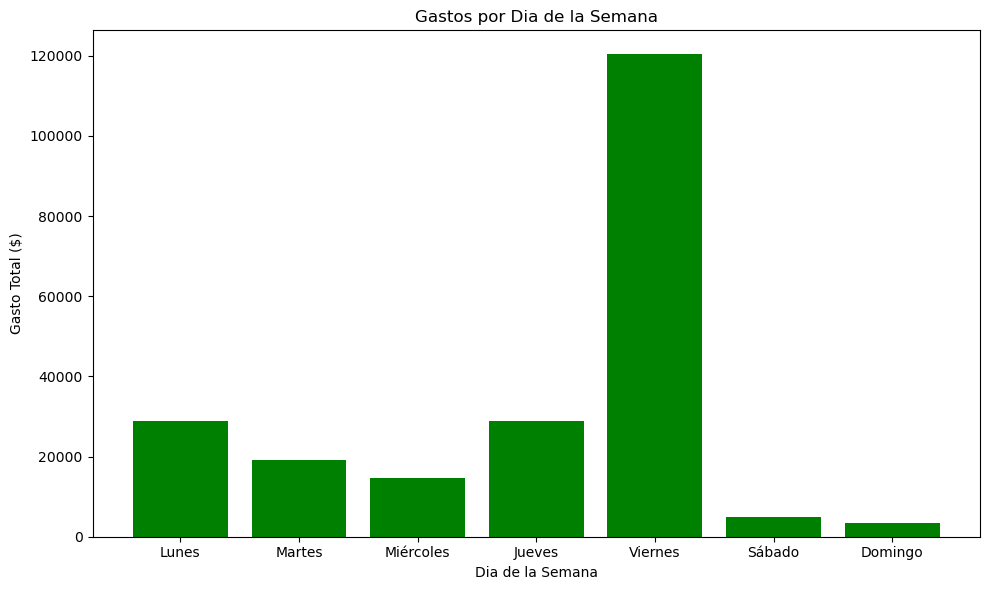

In [55]:
plt.figure(figsize=(10,6))
plt.bar(dias_semana,gastos_por_dia,color='g')
plt.title('Gastos por Dia de la Semana')
plt.xlabel('Dia de la Semana')
plt.ylabel('Gasto Total ($)')
plt.tight_layout()
plt.show()

¿Cuál es el porcentaje de gastos respecto a los ingresos (paychecks)?

In [58]:
#Calcular el total de ingresos (paychecks)
total_ingresos = df[df['Transaction Type']=='credit']['Amount'].sum()

# Calcular el total de gastos
total_gastos = df[df['Transaction Type']=='debit']['Amount'].sum()

In [69]:
# Calcular el porcentaje de gastos respecto a los ingresos

porcentaje_gastos_ingresos = (total_gastos / total_ingresos) * 100

print(f"El porcentaje de gastos respecto a los ingresos es: {porcentaje_gastos_ingresos:.2f} %")

El porcentaje de gastos respecto a los ingresos es: 77.32 %


In [63]:
df

,Date,Description,Amount,Transaction Type,Category,Account Name,Month,Year,Day_of_Week
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card,1,2018,0
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,1,2018,1
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card,1,2018,1
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,1,2018,2
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card,1,2018,3
...,...,...,...,...,...,...,...,...,...
801,2019-09-27,Biweekly Paycheck,2250.00,credit,Paycheck,Checking,9,2019,4
802,2019-09-28,BP,33.46,debit,Gas & Fuel,Platinum Card,9,2019,5
803,2019-09-28,Sheetz,4.27,debit,Gas & Fuel,Platinum Card,9,2019,5
804,2019-09-30,Starbucks,1.75,debit,Coffee Shops,Platinum Card,9,2019,0


¿Cuánto se gasta en servicios públicos (utilities) en comparación con otras categorías?

In [74]:
# Filtrar las transacciones relacionadas con servicios públicos
gastos_utilities = df[df['Category']=='Utilities']

In [75]:
# Calcular el monto total gastado en servicios públicos
total_gastos_utilities = gastos_utilities['Amount'].sum()

In [78]:
# Calcular el monto total gastado en todas las categorías
total_gastos_categorias = df['Amount'].sum()

In [79]:
# Calcular el porcentaje de gastos en servicios públicos respecto al total de gastos
porcentaje_gastos_utilities = (total_gastos_utilities / total_gastos) * 100

print(f"El porcentaje de gastos en servicios públicos es: {porcentaje_gastos_utilities:.2f}% del total de gastos.")

El porcentaje de gastos en servicios públicos es: 2.89% del total de gastos.
